RICE DATATHON 2025 CHEVRON TRACK

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/UH Gang_Rice Datathon 2025/Datathon Info/training.xlsx', names = ['date', 'category', 'gvwr', 'fuel_type', 'model_year', 'fuel_tech', 'mile_range', 'num_address', 'region', 'veh_population'])
df
# read the excel file and rename the column

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,region,veh_population
0,2019,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,Statewide,395883
1,2020,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,Statewide,370954
2,2021,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,Statewide,349406
3,2019,P,Not Applicable,Gasoline,2019.0,ICE,Not Applicable,≥4,Statewide,348475
4,2019,P,Not Applicable,Gasoline,2018.0,ICE,Not Applicable,≥4,Statewide,333296
...,...,...,...,...,...,...,...,...,...,...
41048,2019,B,Not Applicable,Diesel,1983.0,ICE,Not Applicable,1,Statewide,1
41049,2019,B,Not Applicable,Diesel,1980.0,ICE,Not Applicable,2,Statewide,1
41050,2019,B,Not Applicable,Diesel,1978.0,ICE,Not Applicable,3,Statewide,1
41051,2019,B,Not Applicable,Diesel,1976.0,ICE,Not Applicable,2,Statewide,1


In [ ]:
df.dtypes
#analyze the type of the data
#model_year has the float data type BADDDD


,0
date,int64
category,object
gvwr,object
fuel_type,object
model_year,float64
fuel_tech,object
mile_range,object
num_address,object
region,object
veh_population,int64


In [ ]:
df['category'] = df['category'].astype(str)
veh_population_mean = df.groupby('category')['veh_population'].mean()
df['category_encoded'] = df['category'].map(veh_population_mean)
#Target encoding for category column

In [ ]:
df = df[df['fuel_type'] != 'Unknown'].reset_index(drop = True)
#Eliminate any fuel type "Unknown"

In [ ]:
df = df.dropna(subset = ['model_year']).reset_index(drop = True)
#Eliminate null in model year

In [ ]:

current_year = datetime.now().year
df['vehicle_age'] = current_year - df['model_year']
df
#Calculate vehicle model age from the model year

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,region,veh_population,category_encoded,vehicle_age
0,2019,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,Statewide,395883,19198.968421,5.0
1,2020,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,Statewide,370954,19198.968421,5.0
2,2021,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,1,Statewide,349406,19198.968421,5.0
3,2019,P,Not Applicable,Gasoline,2019.0,ICE,Not Applicable,≥4,Statewide,348475,19198.968421,6.0
4,2019,P,Not Applicable,Gasoline,2018.0,ICE,Not Applicable,≥4,Statewide,333296,19198.968421,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
40359,2019,B,Not Applicable,Diesel,1983.0,ICE,Not Applicable,1,Statewide,1,61.904163,42.0
40360,2019,B,Not Applicable,Diesel,1980.0,ICE,Not Applicable,2,Statewide,1,61.904163,45.0
40361,2019,B,Not Applicable,Diesel,1978.0,ICE,Not Applicable,3,Statewide,1,61.904163,47.0
40362,2019,B,Not Applicable,Diesel,1976.0,ICE,Not Applicable,2,Statewide,1,61.904163,49.0


In [ ]:
df = df[df['num_address'] != 'Unknown'].reset_index(drop = True)
#Drop all "Unknown" number of registered vehicles in the same address

In [ ]:
df['region'].unique()
#Check for all the different variable in region

array(['Statewide'], dtype=object)

In [ ]:
df = df.drop(columns='region')
#There is only 1 which is 'Statewide', so we are dropping the whole column

In [ ]:
category_df = df[df['category'].isin(['T1', 'T2', 'T3', 'T4', 'T5','T6', 'T7'])].groupby(['category', 'gvwr'])['gvwr'].value_counts()
category_df

category  gvwr   
T1        1          1360
          Unknown    1593
T2        1          1780
          Unknown    1671
T3        2          2172
          Unknown    1849
T4        2          2055
          Unknown    1823
T5        3          1748
T6        4          1593
          5          1615
          6          1960
          7          1908
          Unknown    1574
T7        8          1812
Name: count, dtype: int64

In [ ]:
#T1, T2, T3, T4 only have gvwr of either 1, 2, so we can fill in the 'Unknown' accordingly

In [ ]:
df.loc[df['category'] == 'T1', 'gvwr'] = 1

In [ ]:
df.loc[df['category'] == 'T2', 'gvwr'] = 1

In [ ]:
df.loc[df['category'] == 'T3', 'gvwr'] = 2

In [ ]:
df.loc[df['category'] == 'T4', 'gvwr'] = 2

In [ ]:
mile_col = df.groupby('mile_range')[['mile_range']].count()
mile_col

,mile_range
mile_range,
0 to 50 miles,375
101 to 150 miles,162
51 to 100 miles,249
>150 miles,276
Not Applicable,36472
Unknown,2797


In [ ]:
df[df['mile_range'] == 'Unknown']['fuel_type'].unique()

array(['Electric', 'Gasoline', 'Hydrogen', 'Diesel'], dtype=object)

In [ ]:
df[df['mile_range'] == 'Not Applicable']['fuel_type'].unique()

array(['Gasoline', 'Diesel', 'Natural Gas'], dtype=object)

In [ ]:
# It was declated that mile_range are intended for Electric vehicle only, therefore Gasoline, Diesel, Natural Gas will always have "Not applicable"
# Because of that, we can fill the "Unknown" data where the fuel_type is Gasoline and Diesel by 'Not Applicable'

In [ ]:
df.loc[(df['mile_range'] == 'Unknown') & (df['fuel_type'].isin(['Gasoline', 'Diesel'])), 'mile_range'] = 'Not Applicable'

In [ ]:
df.groupby(['fuel_tech', 'mile_range']).count()

date  category   gvwr  fuel_type  model_year  \
fuel_tech mile_range                                                        
BEV       0 to 50 miles        11        11     11         11          11   
          101 to 150 miles    162       162    162        162         162   
          51 to 100 miles     197       197    197        197         197   
          >150 miles          188       188    188        188         188   
          Not Applicable       22        22     22         22          22   
          Unknown            2685      2685   2685       2685        2685   
FCEV      51 to 100 miles       4         4      4          4           4   
          >150 miles           88        88     88         88          88   
          Unknown              32        32     32         32          32   
ICE       Not Applicable    36472     36472  36472      36472       36472   
PHEV      0 to 50 miles       364       364    364        364         364   
          51 to 100 miles      48        48     48         48          48   
          Not Applicable       58        58     58         58          58   

                            num_address  veh_population  category_encoded  \
fuel_tech mile_range                                                        
BEV       0 to 50 miles              11              11                11   
          101 to 150 miles          162             162               162   
          51 to 100 miles           197             197               197   
          >150 miles                188             188               188   
          Not Applicable             22              22                22   
          Unknown                  2685            2685              2685   
FCEV      51 to 100 miles             4               4                 4   
          >150 miles                 88              88                88   
          Unknown                    32              32                32   
ICE       Not Applicable          36472           36472             36472   
PHEV      0 to 50 miles             364             364               364   
          51 to 100 miles            48              48                48   
          Not Applicable             58              58                58   

                            vehicle_age  
fuel_tech mile_range                     
BEV       0 to 50 miles              11  
          101 to 150 miles          162  
          51 to 100 miles           197  
          >150 miles                188  
          Not Applicable             22  
          Unknown                  2685  
FCEV      51 to 100 miles             4  
          >150 miles                 88  
          Unknown                    32  
ICE       Not Applicable          36472  
PHEV      0 to 50 miles             364  
          51 to 100 miles            48  
          Not Applicable             58

In [ ]:
# We can also fill the mile_range where fuel_tech are PHEV and FCEV

In [ ]:
df.loc[(df['fuel_tech'] == 'FCEV') & (df['mile_range'] == 'Unknown'), 'mile_range'] = '>150 miles'

In [ ]:
unknown_mile = df[df['mile_range'] == 'Unknown']
unknown_mile.groupby('fuel_type').count()

,date,category,gvwr,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,vehicle_age
fuel_type,,,,,,,,,,
Electric,2685,2685,2685,2685,2685,2685,2685,2685,2685,2685


In [ ]:
df_cat_mile = df[df['fuel_type'] == 'Electric'].groupby(['category', 'mile_range']).count()
df_cat_mile

date  gvwr  fuel_type  model_year  fuel_tech  \
category mile_range                                                       
B        Unknown            137   137        137         137        137   
BS       Unknown             38    38         38          38         38   
BT       Unknown            121   121        121         121        121   
MC       Unknown            430   430        430         430        430   
MH       Unknown              4     4          4           4          4   
P        0 to 50 miles       11    11         11          11         11   
         101 to 150 miles    47    47         47          47         47   
         51 to 100 miles    153   153        153         153        153   
         >150 miles         168   168        168         168        168   
         Unknown            676   676        676         676        676   
T1       101 to 150 miles    61    61         61          61         61   
         51 to 100 miles      4     4          4           4          4   
         Unknown            401   401        401         401        401   
T2       101 to 150 miles    54    54         54          54         54   
         51 to 100 miles     18    18         18          18         18   
         >150 miles          20    20         20          20         20   
         Unknown            240   240        240         240        240   
T3       51 to 100 miles      3     3          3           3          3   
         Unknown            220   220        220         220        220   
T4       Unknown            186   186        186         186        186   
T5       Unknown             41    41         41          41         41   
T6       Unknown            146   146        146         146        146   
T7       Unknown             45    45         45          45         45   

                           num_address  veh_population  category_encoded  \
category mile_range                                                        
B        Unknown                   137             137               137   
BS       Unknown                    38              38                38   
BT       Unknown                   121             121               121   
MC       Unknown                   430             430               430   
MH       Unknown                     4               4                 4   
P        0 to 50 miles              11              11                11   
         101 to 150 miles           47              47                47   
         51 to 100 miles           153             153               153   
         >150 miles                168             168               168   
         Unknown                   676             676               676   
T1       101 to 150 miles           61              61                61   
         51 to 100 miles             4               4                 4   
         Unknown                   401             401               401   
T2       101 to 150 miles           54              54                54   
         51 to 100 miles            18              18                18   
         >150 miles                 20              20                20   
         Unknown                   240             240               240   
T3       51 to 100 miles             3               3                 3   
         Unknown                   220             220               220   
T4       Unknown                   186             186               186   
T5       Unknown                    41              41                41   
T6       Unknown                   146             146               146   
T7       Unknown                    45              45                45   

                           vehicle_age  
category mile_range                     
B        Unknown                   137  
BS       Unknown                    38  
BT       Unknown                   121  
MC       Unknown                   430  
MH  

In [ ]:
#df = df[~((df['category'].isin(['B', 'BS', 'BT', 'MC', 'MH', 'T4', 'T5', 'T6', 'T7'])) & (df['mile_range'] == 'Unknown'))].reset_index(drop=True)

In [ ]:
df['mile_range_encoded'] = 0
df.loc[(df['mile_range'] == 'Not Applicable'),'mile_range_encoded'] = 0
df.loc[(df['mile_range'] == '0 to 50 miles'),'mile_range_encoded'] = 1
df.loc[(df['mile_range'] == '51 to 100 miles'),'mile_range_encoded'] = 2
df.loc[(df['mile_range'] == '101 to 150 miles'),'mile_range_encoded'] = 3
df.loc[(df['mile_range'] == '>150 miles'),'mile_range_encoded'] = 4
df = df[df['mile_range'] != 'Unknown'].reset_index(drop = True)

#label encode for mile_range

In [ ]:
df[df.duplicated() == True]

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,vehicle_age,mile_range_encoded
10290,2022,T2,1,Diesel,2021.0,ICE,Not Applicable,≥4,379,7776.814233,4.0,0
15186,2020,T2,1,Gasoline,1982.0,ICE,Not Applicable,1,123,7776.814233,43.0,0
23583,2019,T4,2,Natural Gas,2004.0,ICE,Not Applicable,≥4,18,1150.182420,21.0,0
24334,2021,T2,1,Diesel,1990.0,ICE,Not Applicable,≥4,15,7776.814233,35.0,0
24446,2019,T2,1,Diesel,1990.0,ICE,Not Applicable,≥4,15,7776.814233,35.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
37485,2019,T3,2,Diesel,1981.0,ICE,Not Applicable,2,1,5129.417607,44.0,0
37540,2019,T1,1,Diesel,2008.0,ICE,Not Applicable,1,1,2691.021580,17.0,0
37542,2019,T1,1,Diesel,2007.0,ICE,Not Applicable,3,1,2691.021580,18.0,0
37544,2019,T1,1,Diesel,2006.0,ICE,Not Applicable,1,1,2691.021580,19.0,0


In [ ]:
#eliminate all duplication
df = df.drop_duplicates().reset_index(drop = True)

In [ ]:
#drop all null of vehicle population
df = df.dropna(subset='veh_population')

In [ ]:
df = df[df['veh_population'] != 0].reset_index(drop = True)

In [ ]:
#change "Not Applicable" to 0 to create the labeling for gvwr"
df.loc[(df['gvwr'] == 'Not Applicable'),'gvwr'] = 0
df = df[df['gvwr'] != 'Unknown'].reset_index(drop = True)

In [ ]:
#change all the >4 num_address to 4 to create labeling
df.loc[~df['num_address'].isin([1, 2, 3]), 'num_address'] = 4

df['num_address'] = df['num_address'].astype(int)

In [ ]:
df['gvwr'] = df['gvwr'].astype(int)
df['vehicle_age'] = df['vehicle_age'].astype(int)

In [ ]:
df.dtypes

,0
date,int64
category,object
gvwr,int64
fuel_type,object
model_year,float64
fuel_tech,object
mile_range,object
num_address,int64
veh_population,int64
category_encoded,float64


In [ ]:
df_endcoded =  pd.get_dummies(df[['fuel_type', 'fuel_tech']])
df_endcoded[['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline',
             'fuel_type_Hydrogen', 'fuel_type_Natural Gas', 'fuel_tech_BEV',
             'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV'] == True] = 1
df_endcoded[['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline',
             'fuel_type_Hydrogen', 'fuel_type_Natural Gas', 'fuel_tech_BEV',
             'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV'] == False] = 0

In [ ]:
df_test = pd.merge(df, df_endcoded, on = df.index)
df_test

,key_0,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,...,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV,False
0,0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,...,False,False,True,False,False,False,False,True,False,0
1,1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,...,False,False,True,False,False,False,False,True,False,0
2,2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,...,False,False,True,False,False,False,False,True,False,0
3,3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,...,False,False,True,False,False,False,False,True,False,0
4,4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,...,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,36100,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,...,True,False,False,False,False,False,False,True,False,0
36101,36101,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,...,True,False,False,False,False,False,False,True,False,0
36102,36102,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,...,True,False,False,False,False,False,False,True,False,0
36103,36103,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,...,True,False,False,False,False,False,False,True,False,0


In [ ]:
df_test = df_test.drop(columns = ['key_0', False])
df_test

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,19198.968421,...,0,False,False,True,False,False,False,False,True,False
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,19198.968421,...,0,False,False,True,False,False,False,False,True,False
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,19198.968421,...,0,False,False,True,False,False,False,False,True,False
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,19198.968421,...,0,False,False,True,False,False,False,False,True,False
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,19198.968421,...,0,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,61.904163,...,0,True,False,False,False,False,False,False,True,False
36101,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,61.904163,...,0,True,False,False,False,False,False,False,True,False
36102,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,61.904163,...,0,True,False,False,False,False,False,False,True,False
36103,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,61.904163,...,0,True,False,False,False,False,False,False,True,False


In [ ]:
cols = ['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hydrogen',
        'fuel_type_Natural Gas', 'fuel_tech_BEV', 'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV']

for var in cols:
  df_test.loc[(df_test[var] == True), var] = 1
  df_test.loc[(df_test[var] == False), var] = 0

df_test

<ipython-input-118-7a3debbe69b1>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test.loc[(df_test[var] == True), var] = 1
<ipython-input-118-7a3debbe69b1>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test.loc[(df_test[var] == True), var] = 1
<ipython-input-118-7a3debbe69b1>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test.loc[(df_test[var] == True), var] = 1
<ipython-input-118-7a3debbe69b1>:5: FutureWarning: Setting an item of incompatible dtype is depre

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,19198.968421,...,0,0,0,1,0,0,0,0,1,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,19198.968421,...,0,0,0,1,0,0,0,0,1,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,19198.968421,...,0,0,0,1,0,0,0,0,1,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,19198.968421,...,0,0,0,1,0,0,0,0,1,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,19198.968421,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36101,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36102,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36103,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
cols = ['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hydrogen',
        'fuel_type_Natural Gas', 'fuel_tech_BEV', 'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV']
df_test[cols] = df_test[cols].astype(int)

In [ ]:
df = df_test
df

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,19198.968421,...,0,0,0,1,0,0,0,0,1,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,19198.968421,...,0,0,0,1,0,0,0,0,1,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,19198.968421,...,0,0,0,1,0,0,0,0,1,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,19198.968421,...,0,0,0,1,0,0,0,0,1,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,19198.968421,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36101,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36102,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36103,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0


DATA EXPLORATORY ANALYSIS

<ipython-input-121-a14b8bd69068>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'date', y = 'veh_population', data = df_date, palette = ['#0033A0'])
<ipython-input-121-a14b8bd69068>:2: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'date', y = 'veh_population', data = df_date, palette = ['#0033A0'])


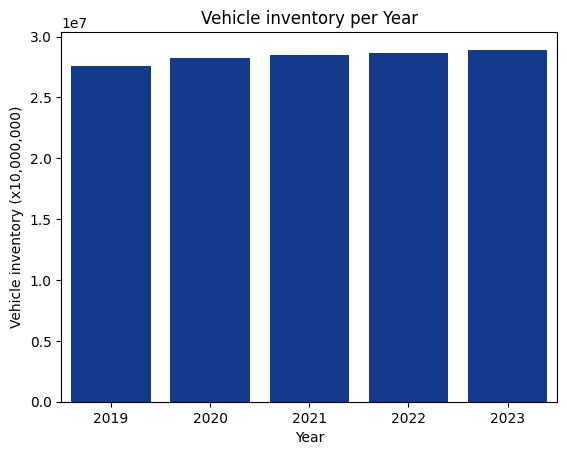

In [ ]:
df_date = df.groupby('date', as_index = False)['veh_population'].sum()
sns.barplot(x = 'date', y = 'veh_population', data = df_date, palette = ['#0033A0'])
plt.xlabel('Year')
plt.ylabel('Vehicle inventory (x10,000,000)')
plt.title('Vehicle inventory per Year')
plt.show()

<ipython-input-122-e970b7615e6c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'category', y = 'veh_population', data = df_category, palette = ['#0033A0'])
<ipython-input-122-e970b7615e6c>:2: UserWarning: 
The palette list has fewer values (1) than needed (13) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'category', y = 'veh_population', data = df_category, palette = ['#0033A0'])


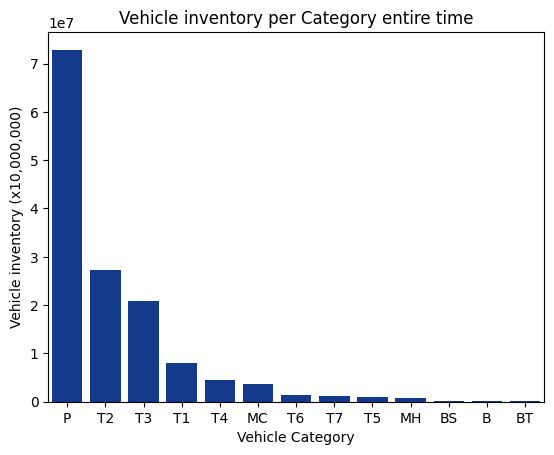

In [ ]:
df_category = df.groupby('category', as_index = False)['veh_population'].sum().sort_values(by = 'veh_population', ascending = False)
sns.barplot(x = 'category', y = 'veh_population', data = df_category, palette = ['#0033A0'])
plt.xlabel('Vehicle Category')
plt.ylabel('Vehicle inventory (x10,000,000)')
plt.title('Vehicle inventory per Category entire time')
plt.show()

In [ ]:
# The most vehicle per category: P, T2, T3, T1

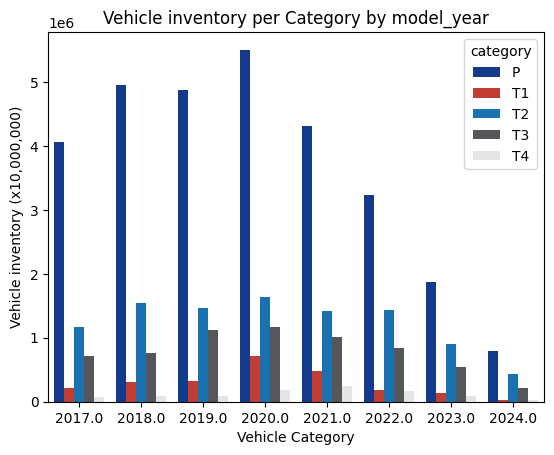

In [ ]:
df_category = df.groupby(['model_year', 'category'], as_index = False)['veh_population'].sum()
category_head = df_category[df_category['category'].isin(['P', 'T1', 'T2', 'T3', 'T4'])]
category_year = category_head[category_head['model_year'].between(2017, 2024)]
chevron_palette = ['#0033A0', '#DA291C', '#0077C8', '#54565A', '#E5E5E5']
sns.barplot(x = 'model_year', y = 'veh_population', hue = 'category', data = category_year, palette = chevron_palette)
plt.xlabel('Vehicle Category')
plt.ylabel('Vehicle inventory (x10,000,000)')
plt.title('Vehicle inventory per Category by model_year')
plt.show()

<Axes: xlabel='gvwr', ylabel='veh_population'>

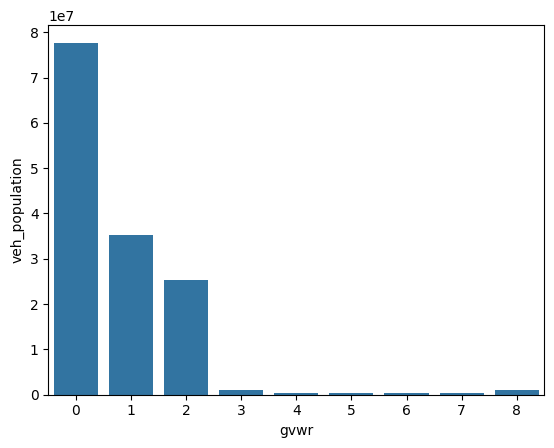

In [ ]:
df_gvwr = df.groupby('gvwr').sum('veh_population')['veh_population'].sort_values(ascending=False)
sns.barplot(data = df_gvwr)

In [ ]:
# The category and the gvwr column may show the same thing
# The P type (small passenger car) may be not applicable in the gvwr since it can not carry weight

<ipython-input-127-575451bb6e7c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'fuel_type', y = 'veh_population', data = df_fuel_type, palette = ['#0033A0'])
<ipython-input-127-575451bb6e7c>:2: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x = 'fuel_type', y = 'veh_population', data = df_fuel_type, palette = ['#0033A0'])


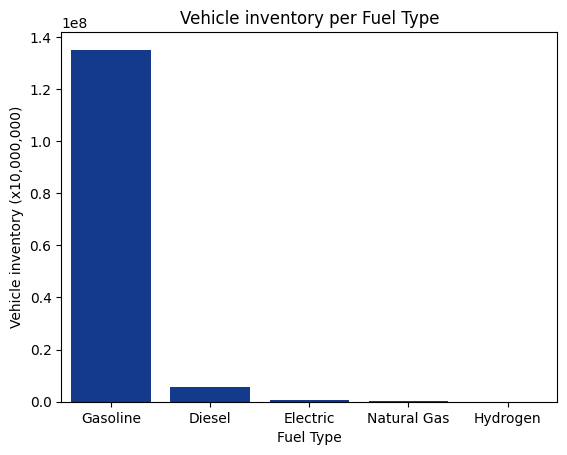

In [ ]:
df_fuel_type = df.groupby('fuel_type', as_index = False)['veh_population'].sum().sort_values(by = 'veh_population', ascending = False)
sns.barplot(x = 'fuel_type', y = 'veh_population', data = df_fuel_type, palette = ['#0033A0'])
plt.xlabel('Fuel Type')
plt.ylabel('Vehicle inventory (x10,000,000)')
plt.title('Vehicle inventory per Fuel Type')
plt.show()

In [ ]:
# Gasoline is the highest

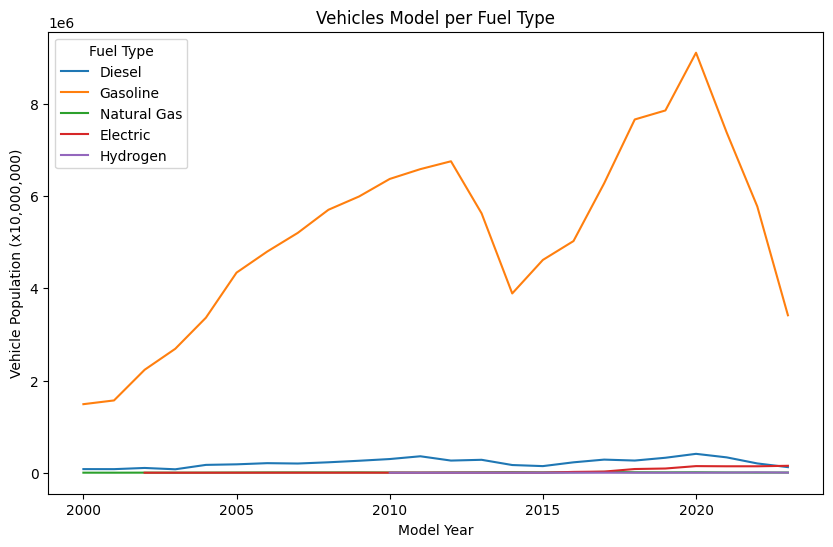

In [ ]:
# Group by 'model_year' and 'fuel_type' and sum 'veh_population'
df_grouped = df[df['model_year'].between(2000, 2023)].groupby(['model_year', 'fuel_type'], as_index=False)['veh_population'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='model_year', y='veh_population', hue='fuel_type')

plt.xlabel('Model Year')
plt.ylabel('Vehicle Population (x10,000,000)')
plt.title('Vehicle''s Model per Fuel Type' )
plt.legend(title='Fuel Type')

plt.show()

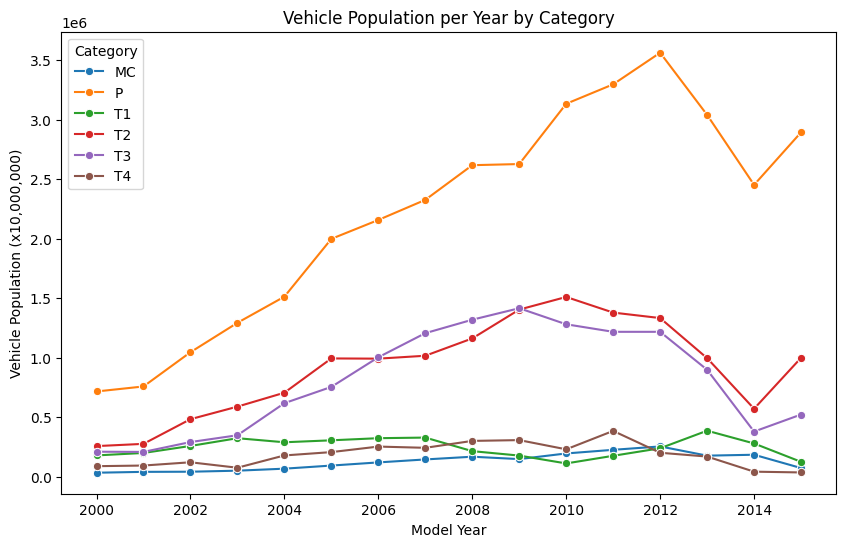

In [ ]:
# Group by 'model_year' and 'category' and sum 'veh_population'
df_grouped = df[(df['category'].isin(['P', 'T1', 'T2', 'T3', 'T4', 'MC'])) & (df['model_year'].between(2000, 2015))].groupby(['model_year', 'category'], as_index=False)['veh_population'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_grouped, x='model_year', y='veh_population', hue='category', marker='o')

plt.xlabel('Model Year')
plt.ylabel('Vehicle Population (x10,000,000)')
plt.title('Vehicle Population per Year by Category')
plt.legend(title='Category')

plt.show()

<Axes: xlabel='fuel_tech', ylabel='veh_population'>

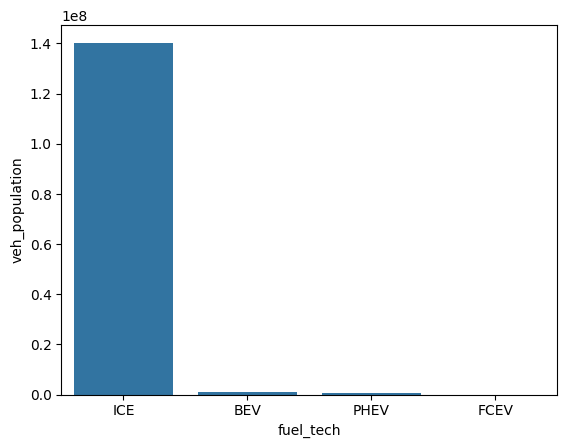

In [ ]:
df_fuel_tech = df.groupby('fuel_tech').sum('veh_population')['veh_population'].sort_values(ascending = False)
sns.barplot(data = df_fuel_tech)

<Axes: xlabel='num_address', ylabel='veh_population'>

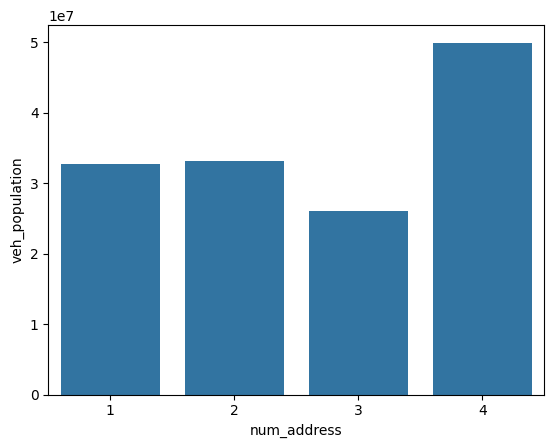

In [ ]:
df_num_add = df.groupby('num_address').sum('veh_population')['veh_population'].sort_values(ascending = False)
sns.barplot(data = df_num_add)

MODEL TRAINING

In [ ]:
df

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,19198.968421,...,0,0,0,1,0,0,0,0,1,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,19198.968421,...,0,0,0,1,0,0,0,0,1,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,19198.968421,...,0,0,0,1,0,0,0,0,1,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,19198.968421,...,0,0,0,1,0,0,0,0,1,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,19198.968421,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36101,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36102,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36103,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
correlation_matrix = df.drop(columns = ['category', 'fuel_type', 'fuel_tech', 'mile_range']).corr()

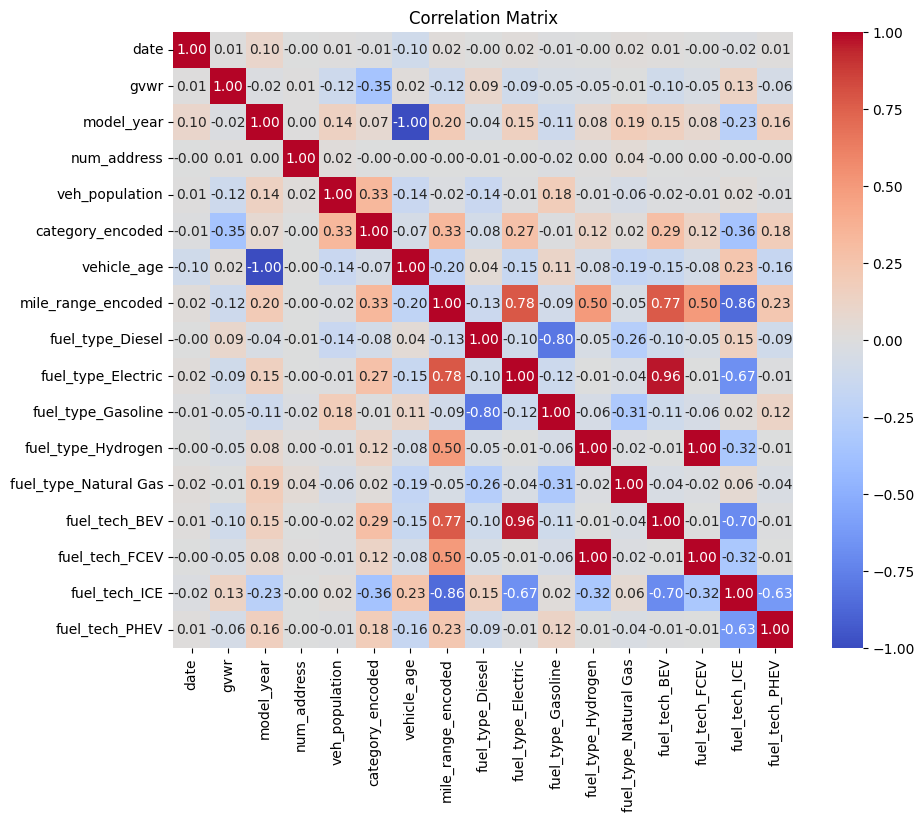

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop(columns=['veh_population', 'category', 'fuel_type', 'fuel_tech', 'mile_range', 'model_year', 'fuel_type_Electric', 'fuel_type_Hydrogen', 'fuel_tech_ICE', 'fuel_type_Gasoline','mile_range_encoded'])
y = df['veh_population']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
df

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2019,P,0,Gasoline,2020.0,ICE,Not Applicable,4,395883,19198.968421,...,0,0,0,1,0,0,0,0,1,0
1,2020,P,0,Gasoline,2020.0,ICE,Not Applicable,1,370954,19198.968421,...,0,0,0,1,0,0,0,0,1,0
2,2021,P,0,Gasoline,2020.0,ICE,Not Applicable,1,349406,19198.968421,...,0,0,0,1,0,0,0,0,1,0
3,2019,P,0,Gasoline,2019.0,ICE,Not Applicable,4,348475,19198.968421,...,0,0,0,1,0,0,0,0,1,0
4,2019,P,0,Gasoline,2018.0,ICE,Not Applicable,4,333296,19198.968421,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,2019,B,0,Diesel,1983.0,ICE,Not Applicable,1,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36101,2019,B,0,Diesel,1980.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36102,2019,B,0,Diesel,1978.0,ICE,Not Applicable,3,1,61.904163,...,0,1,0,0,0,0,0,0,1,0
36103,2019,B,0,Diesel,1976.0,ICE,Not Applicable,2,1,61.904163,...,0,1,0,0,0,0,0,0,1,0


RANDOM FOREST

In [ ]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f" Root Mean Squared Error: {rmse}")


 Root Mean Squared Error: 9444.062402385909


In [ ]:
y_test.mean()

3701.569588699626

In [ ]:

r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2}")


R² Score: 0.7484956393564532


CLEAN AND TEST DATA IN THE SCORING FILE

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/UH Gang_Rice Datathon 2025/Datathon Info/scoring.xlsx', names = ['date', 'category', 'gvwr', 'fuel_type', 'model_year', 'fuel_tech', 'mile_range', 'num_address', 'region', 'veh_population'])
df1
# read the excel file and rename the column

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,region,veh_population
0,2024,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,Statewide,316065
1,2024,P,Not Applicable,Gasoline,2021.0,ICE,Not Applicable,≥4,Statewide,315986
2,2024,P,Not Applicable,Gasoline,2022.0,ICE,Not Applicable,≥4,Statewide,306487
3,2024,P,Not Applicable,Gasoline,2024.0,ICE,Not Applicable,≥4,Statewide,284754
4,2024,P,Not Applicable,Gasoline,2023.0,ICE,Not Applicable,≥4,Statewide,284153
...,...,...,...,...,...,...,...,...,...,...
7541,2024,B,Not Applicable,Diesel,1989.0,ICE,Not Applicable,3,Statewide,1
7542,2024,B,Not Applicable,Diesel,1988.0,ICE,Not Applicable,2,Statewide,1
7543,2024,B,Not Applicable,Diesel,1988.0,ICE,Not Applicable,3,Statewide,1
7544,2024,B,Not Applicable,Diesel,1987.0,ICE,Not Applicable,2,Statewide,1


In [ ]:
df1['category'] = df1['category'].astype(str)
veh_population_mean1 = df1.groupby('category')['veh_population'].mean()
df1['category_encoded'] = df1['category'].map(veh_population_mean1)
#Target encoding for category column

In [ ]:
df1 = df1[df1['fuel_type'] != 'Unknown'].reset_index(drop = True)
#Eliminate any fuel type "Unknown"

In [ ]:
df1 = df1.dropna(subset = ['model_year']).reset_index(drop = True)
#Eliminate null in model year

In [ ]:

current_year1 = datetime.now().year
df1['vehicle_age'] = current_year1 - df1['model_year']
df1
#Calculate vehicle model age from the model year

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,region,veh_population,category_encoded,vehicle_age
0,2024,P,Not Applicable,Gasoline,2020.0,ICE,Not Applicable,≥4,Statewide,316065,18272.509677,5.0
1,2024,P,Not Applicable,Gasoline,2021.0,ICE,Not Applicable,≥4,Statewide,315986,18272.509677,4.0
2,2024,P,Not Applicable,Gasoline,2022.0,ICE,Not Applicable,≥4,Statewide,306487,18272.509677,3.0
3,2024,P,Not Applicable,Gasoline,2024.0,ICE,Not Applicable,≥4,Statewide,284754,18272.509677,1.0
4,2024,P,Not Applicable,Gasoline,2023.0,ICE,Not Applicable,≥4,Statewide,284153,18272.509677,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7435,2024,B,Not Applicable,Diesel,1989.0,ICE,Not Applicable,3,Statewide,1,51.250000,36.0
7436,2024,B,Not Applicable,Diesel,1988.0,ICE,Not Applicable,2,Statewide,1,51.250000,37.0
7437,2024,B,Not Applicable,Diesel,1988.0,ICE,Not Applicable,3,Statewide,1,51.250000,37.0
7438,2024,B,Not Applicable,Diesel,1987.0,ICE,Not Applicable,2,Statewide,1,51.250000,38.0


In [ ]:
df1 = df1[df1['num_address'] != 'Unknown'].reset_index(drop = True)
#Drop all "Unknown" number of registered vehicles in the same address

In [ ]:
df1['region'].unique()
#Check for all the different variable in region

array(['Statewide'], dtype=object)

In [ ]:
df1 = df1.drop(columns='region')
#There is only 1 which is 'Statewide', so we are dropping the whole column

In [ ]:
category_df1 = df1[df1['category'].isin(['T1', 'T2', 'T3', 'T4', 'T5','T6', 'T7'])].groupby(['category', 'gvwr'])['gvwr'].value_counts()
category_df1

category  gvwr   
T1        1          259
          Unknown     28
T2        1          365
          Unknown    103
T3        2          437
          Unknown    261
T4        2          423
          Unknown    276
T5        3          344
T6        4          333
          5          315
          6          388
          7          371
          Unknown    397
T7        8          374
Name: count, dtype: int64

In [ ]:
df1.loc[df1['category'] == 'T1', 'gvwr'] = 1

In [ ]:
df1.loc[df1['category'] == 'T2', 'gvwr'] = 1

In [ ]:
df1.loc[df1['category'] == 'T3', 'gvwr'] = 2

In [ ]:
df1.loc[df1['category'] == 'T4', 'gvwr'] = 2

In [ ]:
df1.loc[(df1['mile_range'] == 'Unknown') & (df1['fuel_type'].isin(['Gasoline', 'Diesel'])), 'mile_range'] = 'Not Applicable'

In [ ]:
df1.loc[(df1['fuel_tech'] == 'FCEV') & (df1['mile_range'] == 'Unknown'), 'mile_range'] = '>150 miles'

In [ ]:
df1['mile_range_encoded'] = 0
df1.loc[(df1['mile_range'] == 'Not Applicable'),'mile_range_encoded'] = 0
df1.loc[(df1['mile_range'] == '0 to 50 miles'),'mile_range_encoded'] = 1
df1.loc[(df1['mile_range'] == '51 to 100 miles'),'mile_range_encoded'] = 2
df1.loc[(df1['mile_range'] == '101 to 150 miles'),'mile_range_encoded'] = 3
df1.loc[(df1['mile_range'] == '>150 miles'),'mile_range_encoded'] = 4
df1 = df1[df1['mile_range'] != 'Unknown'].reset_index(drop = True)

#label encode for mile_range

In [ ]:
#eliminate all duplication
df1 = df1.drop_duplicates().reset_index(drop = True)

In [ ]:
#drop all null of vehicle population
df1 = df1.dropna(subset='veh_population')

In [ ]:
df1 = df1[df1['veh_population'] != 0].reset_index(drop = True)

In [ ]:
#change "Not Applicable" to 0 to create the labeling for gvwr"
df1.loc[(df1['gvwr'] == 'Not Applicable'),'gvwr'] = 0
df1 = df1[df1['gvwr'] != 'Unknown'].reset_index(drop = True)

In [ ]:
#change all the >4 num_address to 4 to create labeling
df1.loc[~df1['num_address'].isin([1, 2, 3]), 'num_address'] = 4

df1['num_address'] = df1['num_address'].astype(int)

In [ ]:
df1['gvwr'] = df1['gvwr'].astype(int)
df1['vehicle_age'] = df1['vehicle_age'].astype(int)

In [ ]:
df_endcoded1 =  pd.get_dummies(df1[['fuel_type', 'fuel_tech']])
df_endcoded1[['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hydrogen', 'fuel_type_Natural Gas', 'fuel_tech_BEV', 'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV'] == True] = 1
df_endcoded1[['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hydrogen', 'fuel_type_Natural Gas', 'fuel_tech_BEV', 'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV'] == False] = 0

In [ ]:
df_test1 = pd.merge(df1, df_endcoded1, on = df1.index)
df_test1

,key_0,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,...,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV,False
0,0,2024,P,0,Gasoline,2020.0,ICE,Not Applicable,4,316065,...,False,False,True,False,False,False,False,True,False,0
1,1,2024,P,0,Gasoline,2021.0,ICE,Not Applicable,4,315986,...,False,False,True,False,False,False,False,True,False,0
2,2,2024,P,0,Gasoline,2022.0,ICE,Not Applicable,4,306487,...,False,False,True,False,False,False,False,True,False,0
3,3,2024,P,0,Gasoline,2024.0,ICE,Not Applicable,4,284754,...,False,False,True,False,False,False,False,True,False,0
4,4,2024,P,0,Gasoline,2023.0,ICE,Not Applicable,4,284153,...,False,False,True,False,False,False,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,6600,2024,B,0,Diesel,1989.0,ICE,Not Applicable,3,1,...,True,False,False,False,False,False,False,True,False,0
6601,6601,2024,B,0,Diesel,1988.0,ICE,Not Applicable,2,1,...,True,False,False,False,False,False,False,True,False,0
6602,6602,2024,B,0,Diesel,1988.0,ICE,Not Applicable,3,1,...,True,False,False,False,False,False,False,True,False,0
6603,6603,2024,B,0,Diesel,1987.0,ICE,Not Applicable,2,1,...,True,False,False,False,False,False,False,True,False,0


In [ ]:
df_test1 = df_test1.drop(columns = ['key_0', False])
df_test1

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2024,P,0,Gasoline,2020.0,ICE,Not Applicable,4,316065,18272.509677,...,0,False,False,True,False,False,False,False,True,False
1,2024,P,0,Gasoline,2021.0,ICE,Not Applicable,4,315986,18272.509677,...,0,False,False,True,False,False,False,False,True,False
2,2024,P,0,Gasoline,2022.0,ICE,Not Applicable,4,306487,18272.509677,...,0,False,False,True,False,False,False,False,True,False
3,2024,P,0,Gasoline,2024.0,ICE,Not Applicable,4,284754,18272.509677,...,0,False,False,True,False,False,False,False,True,False
4,2024,P,0,Gasoline,2023.0,ICE,Not Applicable,4,284153,18272.509677,...,0,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,2024,B,0,Diesel,1989.0,ICE,Not Applicable,3,1,51.250000,...,0,True,False,False,False,False,False,False,True,False
6601,2024,B,0,Diesel,1988.0,ICE,Not Applicable,2,1,51.250000,...,0,True,False,False,False,False,False,False,True,False
6602,2024,B,0,Diesel,1988.0,ICE,Not Applicable,3,1,51.250000,...,0,True,False,False,False,False,False,False,True,False
6603,2024,B,0,Diesel,1987.0,ICE,Not Applicable,2,1,51.250000,...,0,True,False,False,False,False,False,False,True,False


In [ ]:
cols = ['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hydrogen',
        'fuel_type_Natural Gas', 'fuel_tech_BEV', 'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV']

for var in cols:
  df_test1.loc[(df_test1[var] == True), var] = 1
  df_test1.loc[(df_test1[var] == False), var] = 0

df_test1

<ipython-input-167-5db9a8363d64>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test1.loc[(df_test1[var] == True), var] = 1
<ipython-input-167-5db9a8363d64>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test1.loc[(df_test1[var] == True), var] = 1
<ipython-input-167-5db9a8363d64>:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  df_test1.loc[(df_test1[var] == True), var] = 1
<ipython-input-167-5db9a8363d64>:5: FutureWarning: Setting an item of incompatible dtype is

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2024,P,0,Gasoline,2020.0,ICE,Not Applicable,4,316065,18272.509677,...,0,0,0,1,0,0,0,0,1,0
1,2024,P,0,Gasoline,2021.0,ICE,Not Applicable,4,315986,18272.509677,...,0,0,0,1,0,0,0,0,1,0
2,2024,P,0,Gasoline,2022.0,ICE,Not Applicable,4,306487,18272.509677,...,0,0,0,1,0,0,0,0,1,0
3,2024,P,0,Gasoline,2024.0,ICE,Not Applicable,4,284754,18272.509677,...,0,0,0,1,0,0,0,0,1,0
4,2024,P,0,Gasoline,2023.0,ICE,Not Applicable,4,284153,18272.509677,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,2024,B,0,Diesel,1989.0,ICE,Not Applicable,3,1,51.250000,...,0,1,0,0,0,0,0,0,1,0
6601,2024,B,0,Diesel,1988.0,ICE,Not Applicable,2,1,51.250000,...,0,1,0,0,0,0,0,0,1,0
6602,2024,B,0,Diesel,1988.0,ICE,Not Applicable,3,1,51.250000,...,0,1,0,0,0,0,0,0,1,0
6603,2024,B,0,Diesel,1987.0,ICE,Not Applicable,2,1,51.250000,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
df1 = df_test1
df1

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,mile_range_encoded,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV
0,2024,P,0,Gasoline,2020.0,ICE,Not Applicable,4,316065,18272.509677,...,0,0,0,1,0,0,0,0,1,0
1,2024,P,0,Gasoline,2021.0,ICE,Not Applicable,4,315986,18272.509677,...,0,0,0,1,0,0,0,0,1,0
2,2024,P,0,Gasoline,2022.0,ICE,Not Applicable,4,306487,18272.509677,...,0,0,0,1,0,0,0,0,1,0
3,2024,P,0,Gasoline,2024.0,ICE,Not Applicable,4,284754,18272.509677,...,0,0,0,1,0,0,0,0,1,0
4,2024,P,0,Gasoline,2023.0,ICE,Not Applicable,4,284153,18272.509677,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,2024,B,0,Diesel,1989.0,ICE,Not Applicable,3,1,51.250000,...,0,1,0,0,0,0,0,0,1,0
6601,2024,B,0,Diesel,1988.0,ICE,Not Applicable,2,1,51.250000,...,0,1,0,0,0,0,0,0,1,0
6602,2024,B,0,Diesel,1988.0,ICE,Not Applicable,3,1,51.250000,...,0,1,0,0,0,0,0,0,1,0
6603,2024,B,0,Diesel,1987.0,ICE,Not Applicable,2,1,51.250000,...,0,1,0,0,0,0,0,0,1,0


In [ ]:
cols = ['fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Gasoline', 'fuel_type_Hydrogen',
        'fuel_type_Natural Gas', 'fuel_tech_BEV', 'fuel_tech_FCEV', 'fuel_tech_ICE', 'fuel_tech_PHEV']
df1[cols] = df1[cols].astype(int)

In [ ]:
X_pred = df1.drop(columns=['veh_population', 'category', 'fuel_type', 'fuel_tech', 'mile_range', 'model_year', 'fuel_type_Electric', 'fuel_type_Hydrogen', 'fuel_tech_ICE', 'fuel_type_Gasoline','mile_range_encoded'])
y_pred_test = model.predict(X_pred)

In [ ]:
df1['Prediction'] = y_pred_test
df1

,date,category,gvwr,fuel_type,model_year,fuel_tech,mile_range,num_address,veh_population,category_encoded,...,fuel_type_Diesel,fuel_type_Electric,fuel_type_Gasoline,fuel_type_Hydrogen,fuel_type_Natural Gas,fuel_tech_BEV,fuel_tech_FCEV,fuel_tech_ICE,fuel_tech_PHEV,Prediction
0,2024,P,0,Gasoline,2020.0,ICE,Not Applicable,4,316065,18272.509677,...,0,0,1,0,0,0,0,1,0,297986.705
1,2024,P,0,Gasoline,2021.0,ICE,Not Applicable,4,315986,18272.509677,...,0,0,1,0,0,0,0,1,0,291318.170
2,2024,P,0,Gasoline,2022.0,ICE,Not Applicable,4,306487,18272.509677,...,0,0,1,0,0,0,0,1,0,282346.785
3,2024,P,0,Gasoline,2024.0,ICE,Not Applicable,4,284754,18272.509677,...,0,0,1,0,0,0,0,1,0,80643.390
4,2024,P,0,Gasoline,2023.0,ICE,Not Applicable,4,284153,18272.509677,...,0,0,1,0,0,0,0,1,0,257242.140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6600,2024,B,0,Diesel,1989.0,ICE,Not Applicable,3,1,51.250000,...,1,0,0,0,0,0,0,1,0,1.925
6601,2024,B,0,Diesel,1988.0,ICE,Not Applicable,2,1,51.250000,...,1,0,0,0,0,0,0,1,0,2.340
6602,2024,B,0,Diesel,1988.0,ICE,Not Applicable,3,1,51.250000,...,1,0,0,0,0,0,0,1,0,2.115
6603,2024,B,0,Diesel,1987.0,ICE,Not Applicable,2,1,51.250000,...,1,0,0,0,0,0,0,1,0,2.765


In [ ]:
mean_square_error1 = np.mean((df1['Prediction'] - df1['veh_population'])**2)
root_mean_se = np.sqrt(mean_square_error1)
root_mean_se

9827.05599560102

In [ ]:
mean_actual = df1['veh_population'].mean()
mean_actual

4315.696442089326

In [ ]:
df1.to_excel('scoring_result.xlsx', index=False)